In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
np.random.seed(42)

n_samples = 500
data = pd.DataFrame({
    'attendance_rate': np.random.uniform(0.4, 1.0, n_samples),
    'test_score': np.random.normal(60, 15, n_samples).clip(0, 100),
    'family_income': np.random.randint(10000, 80000, n_samples),
    'gender': np.random.choice(['Male', 'Female'], n_samples),
    'caste': np.random.choice(['General', 'Dalit', 'Janajati'], n_samples),
    'infrastructure_score': np.random.randint(1, 10, n_samples),
    'dropout': np.random.choice([0, 1], n_samples, p=[0.75, 0.25])
})

In [ ]:
# Encoding categorical features
le_gender = LabelEncoder()
le_caste = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])  # Male=1, Female=0
data['caste'] = le_caste.fit_transform(data['caste'])      # Dalit, General, Janajati → 0,1,2


In [ ]:
# Feature scaling
scaler = MinMaxScaler()
cols_to_scale = ['attendance_rate', 'test_score', 'family_income', 'infrastructure_score']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


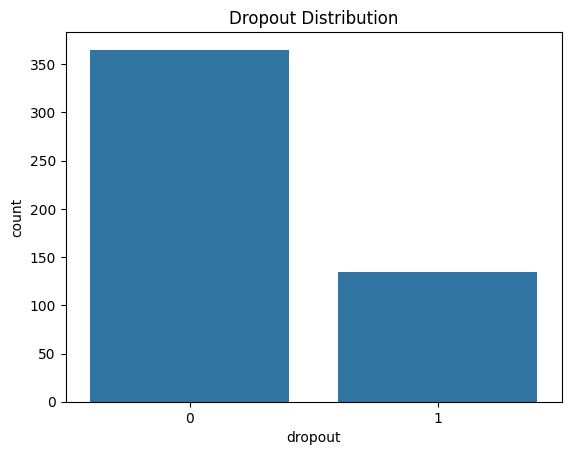

In [ ]:
# Dropout distribution
sns.countplot(x='dropout', data=data)
plt.title('Dropout Distribution')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a boxplot to compare attendance rate across dropout status
plt.figure(figsize=(6, 4))  # Set the size of the plot (optional)

sns.boxplot(
    x='dropout',              # This sets the X-axis to dropout status (0 = stayed, 1 = dropped out)
    y='attendance_rate',      # This sets the Y-axis to attendance rate

    palette="Set2"            # Optional: makes the colors more visually appealing
)

# Add a title and axis labels for better understanding
plt.title('Attendance Rate by Dropout Status', fontsize=14)
plt.xlabel('Dropout (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Attendance Rate (0 to 1)', fontsize=12)

# Show the plot
plt.show()

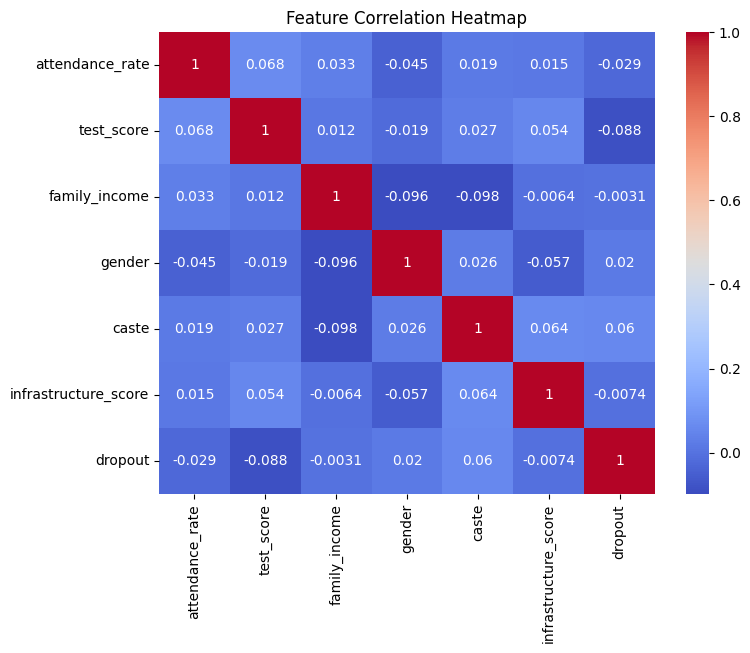

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop('dropout', axis=1)
y = data['dropout']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        73
           1       0.00      0.00      0.00        27

    accuracy                           0.73       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.53      0.73      0.62       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


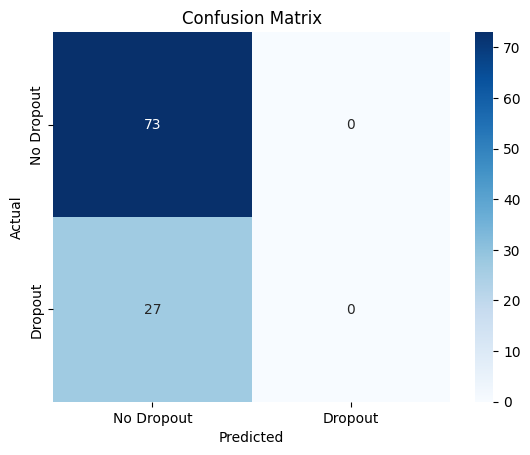

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

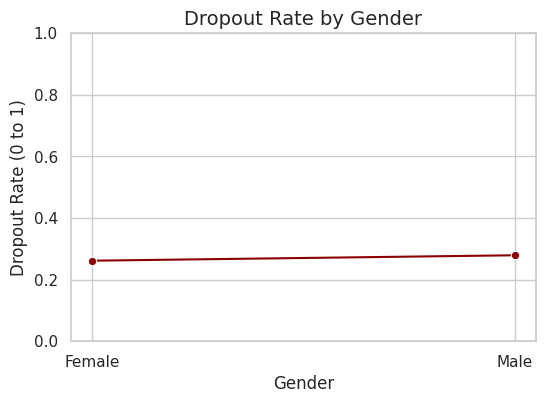

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Recreate a sample data DataFrame for demonstration purposes if 'data' is not defined
# This is a workaround; it's recommended to run all preceding cells to use your actual data.
if 'data' not in locals():
    np.random.seed(42)
    n_samples = 500
    data = pd.DataFrame({
        'attendance_rate': np.random.uniform(0.4, 1.0, n_samples),
        'test_score': np.random.normal(60, 15, n_samples).clip(0, 100),
        'family_income': np.random.randint(10000, 80000, n_samples),
        'gender': np.random.choice(['Male', 'Female'], n_samples),
        'caste': np.random.choice(['General', 'Dalit', 'Janajati'], n_samples),
        'infrastructure_score': np.random.randint(1, 10, n_samples),
        'dropout': np.random.choice([0, 1], n_samples, p=[0.75, 0.25])
    })






# Rename for clarity
gender_dropout.columns = ['Gender', 'Dropout Rate']

# Styling the plot
plt.title('Dropout Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Dropout Rate (0 to 1)', fontsize=12)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

<Axes: xlabel='Gender', ylabel='Dropout Rate'>

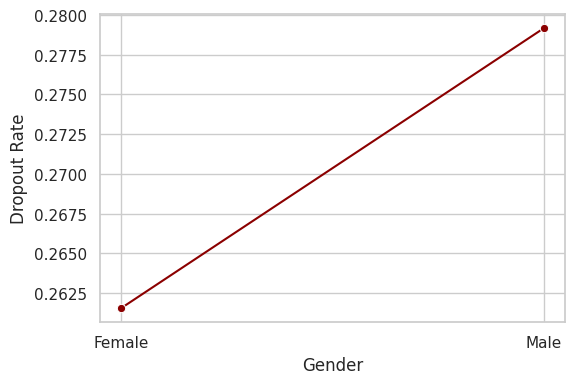

In [ ]:

# Plot as a line graph
plt.figure(figsize=(6, 4))
sns.lineplot(data=gender_dropout, x='Gender', y='Dropout Rate', marker='o', color='darkred')



In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])
scaler = MinMaxScaler()
cols_to_scale = ['attendance_rate', 'test_score', 'family_income', 'infrastructure_score']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [ ]:
# Decode gender back to readable labels
data['gender_label'] = data['gender'].map({1: 'Male', 0: 'Female'})

In [ ]:
# Group by gender and calculate dropout rate
gender_dropout = data.groupby('gender_label')['dropout'].mean().reset_index()

In [ ]:
# Rename for clarity
gender_dropout.columns = ['Gender', 'Dropout Rate']


In [ ]:
# Styling the plot
plt.title('Dropout Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Dropout Rate (0 to 1)', fontsize=12)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

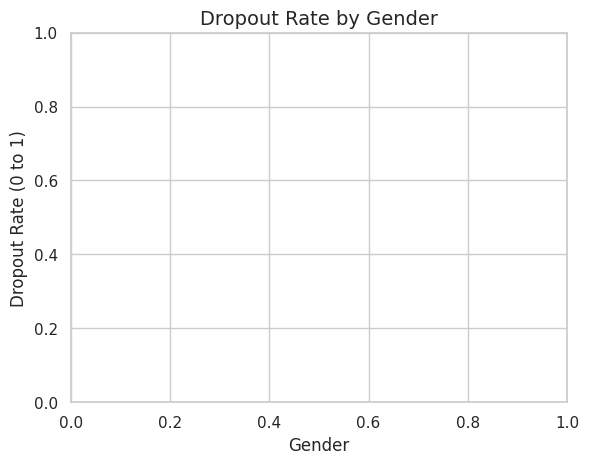

Dropout Rate for Female Students: 0.262


/tmp/ipython-input-19-2688268706.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Female'], y=[female_dropout_rate], palette='pastel')


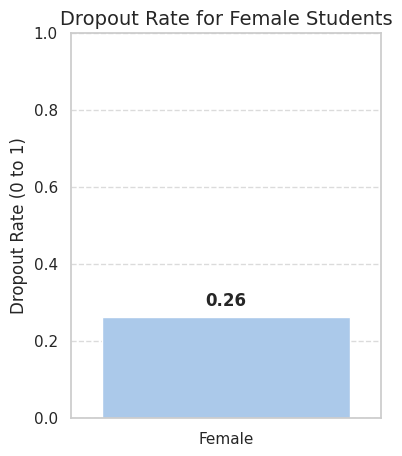

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map gender to readable labels if not already done
data['gender_label'] = data['gender'].map({1: 'Male', 0: 'Female'})

# Filter only female students
female_data = data[data['gender_label'] == 'Female']

# Calculate dropout rate among females
female_dropout_rate = female_data['dropout'].mean()

# Print interpretation
print(f"Dropout Rate for Female Students: {female_dropout_rate:.3f}")

# Create a bar graph
plt.figure(figsize=(4, 5))
sns.barplot(x=['Female'], y=[female_dropout_rate], palette='pastel')

# Style the plot
plt.title('Dropout Rate for Female Students', fontsize=14)
plt.ylabel('Dropout Rate (0 to 1)', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the value on top of the bar
plt.text(0, female_dropout_rate + 0.03, f"{female_dropout_rate:.2f}",
         ha='center', fontsize=12, fontweight='bold')

plt.show()
